In [1]:
#Let's get the data

import tensorflow as tf

# Import MINST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

C:\Users\Vishal\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
#Data Format

type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [3]:
type(mnist.train.images)

numpy.ndarray

In [4]:
#mnist.train.images[0]

mnist.train.images[2].shape

(784,)

In [5]:
sample = mnist.train.images[2].reshape(28,28)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

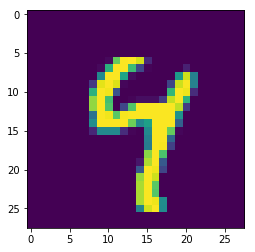

In [7]:
plt.imshow(sample)

In [8]:
# Parameters

learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [9]:
# Network Parameters

n_hidden_1 = 256 # 1st layer number of features
n_hidden_2 = 256 # 2nd layer number of features
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)
n_samples = mnist.train.num_examples

In [10]:
#TensorFlow Graph Input

x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])

In [11]:
#MultiLayer Model

def multilayer_perceptron(x, weights, biases):
    '''
    x : Place Holder for Data Input
    weights: Dictionary of weights
    biases: Dicitionary of biases
    '''
    
    # First Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    
    # Second Hidden layer with RELU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    # Last Output layer with linear activation
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

In [12]:
# Weights 

weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

In [13]:
# Bias

biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [14]:
# Construct model

pred = multilayer_perceptron(x, weights, biases)

In [15]:
# Define loss and optimizer

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [17]:
# Initializing the variables

init = tf.global_variables_initializer()

In [18]:
# Training the Model
# next_batch()

Xsamp,ysamp = mnist.train.next_batch(1)

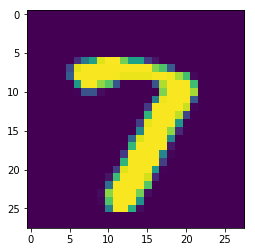

In [19]:
plt.imshow(Xsamp.reshape(28,28))

In [20]:
# Remember indexing starts at zero!

print(ysamp)

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [21]:
# Launch the session

sess = tf.InteractiveSession()

# Intialize all the variables
sess.run(init)

# Training Epochs
# Essentially the max amount of loops possible before we stop
# May stop earlier if cost/loss limit was set
for epoch in range(training_epochs):

    # Start with cost = 0.0
    avg_cost = 0.0

    # Convert total number of batches to integer
    total_batch = int(n_samples/batch_size)

    # Loop over all batches
    for i in range(total_batch):

        # Grab the next batch of training data and labels
        batch_x, batch_y = mnist.train.next_batch(batch_size)

        # Feed dictionary for optimization and loss value
        # Returns a tuple, but we only need 'c' the cost
        # So we set an underscore as a "throwaway"
        _, c = sess.run([optimizer, cost], feed_dict={x: batch_x, y: batch_y})

        # Compute average loss
        avg_cost += c / total_batch

    print("Epoch: {} cost={:.4f}".format(epoch+1,avg_cost))

print("Model has completed {} Epochs of Training".format(training_epochs))

Epoch: 1 cost=196.2776
Epoch: 2 cost=42.6339
Epoch: 3 cost=26.7844
Epoch: 4 cost=18.7553
Epoch: 5 cost=13.7221
Epoch: 6 cost=10.2249
Epoch: 7 cost=7.7669
Epoch: 8 cost=5.8361
Epoch: 9 cost=4.4016
Epoch: 10 cost=3.2420
Epoch: 11 cost=2.5610
Epoch: 12 cost=2.0041
Epoch: 13 cost=1.4499
Epoch: 14 cost=1.1206
Epoch: 15 cost=0.9036
Model has completed 15 Epochs of Training


In [22]:
# Test model

correct_predictions = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

In [23]:
print(correct_predictions[0])

Tensor("strided_slice:0", shape=(), dtype=bool)


In [24]:
# tf.reduce_mean function in order to grab the mean of the elements across the tensor.

correct_predictions = tf.cast(correct_predictions, "float")

In [25]:
print(correct_predictions[0])

Tensor("strided_slice_1:0", shape=(), dtype=float32)


In [26]:
accuracy = tf.reduce_mean(correct_predictions)

In [27]:
type(accuracy)

tensorflow.python.framework.ops.Tensor

In [28]:
#  MNIST test labels and images and evaluate our accuracy!

mnist.test.labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [29]:
mnist.test.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [30]:
#The eval() method allows you to directly evaluates this tensor in a Session without needing to call tf.sess():mm

print("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))

Accuracy: 0.9469
